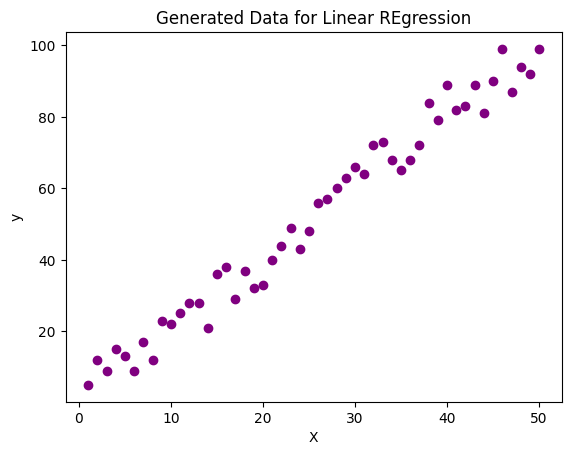

Initial Weight: 0.11
Initial Bias: 0.96
Initial Weight: 0.10597813, Initial Bias: 0.96379614

epoch: 100  loss: 21.03359604 weight: 1.98277164 bias: 1.09101629


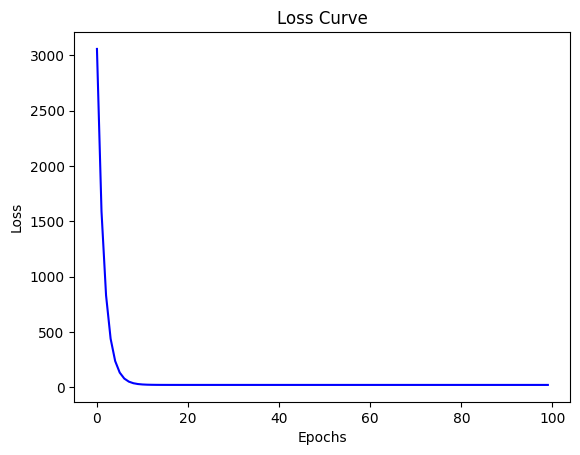


Name: Yashwini M
Register Number: 212223230249

Final Weight: 1.98277164, Final Bias: 1.09101629



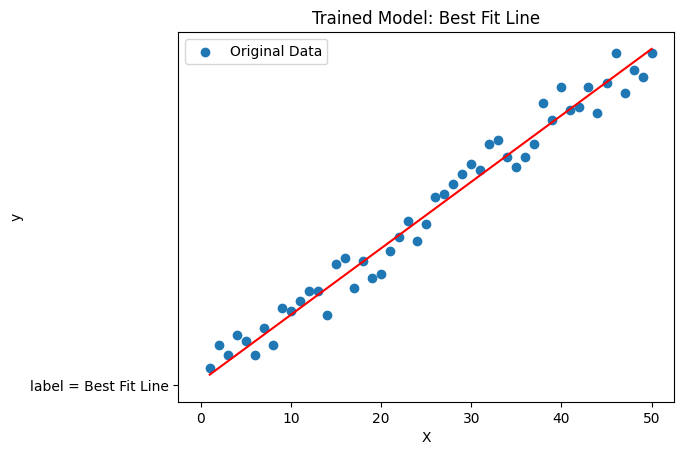


Prediction for x = 120:  239.02362061


In [ ]:
import torch as t
import torch.nn as nn
import matplotlib.pyplot as plt
t.manual_seed(71)
X = t.linspace(1, 50, 50).reshape(-1, 1)
e = t.randint(-8, 9, (50, 1),dtype=t.float)
y = 2 * X + 1 + e
plt.scatter(X.numpy(), y.numpy(),color = 'purple')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data for Linear REgression')
plt.show()
class Model(nn.Module):
  def __init__(self,in_features,out_features):
    super().__init__()
    self.linear = nn.Linear(in_features, out_features)
  def forward(self,x):
      return self.linear(x)
t.manual_seed(59)
model = Model(1,1)
initial_weight = model.linear.weight.item()
initial_bias = model.linear.bias.item()
print(f"Initial Weight: {initial_weight:.2f}")
print(f"Initial Bias: {initial_bias:.2f}")

print(f'Initial Weight: {initial_weight:.8f}, Initial Bias: {initial_bias:.8f}\n')
loss_function = nn.MSELoss()
optimizer = t.optim.SGD(model.parameters(), lr = 0.001)
epochs = 100
losses = []
for epoch in range(1, epochs + 1):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_function(y_pred, y)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
print(f'epoch: {epoch:2}  loss: {loss.item():10.8f} '
      f'weight: {model.linear.weight.item():10.8f} '
      f'bias: {model.linear.bias.item():10.8f}')
plt.plot(range(epochs),losses,color='blue')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Loss Curve')
plt.show()
final_weight = model.linear.weight.item()
final_bias = model.linear.bias.item()

print("\nName: Yashwini M")
print("Register Number: 212223230249\n")

print(f'Final Weight: {final_weight:.8f}, Final Bias: {final_bias:.8f}\n')
x1 = t.tensor([X.min().item(),X.max().item()])
y1 = x1*final_weight + final_bias
plt.scatter(X.numpy(), y.numpy(),label = 'Original Data')
plt.plot(x1.numpy(), y1.numpy(), 'r','label = Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Trained Model: Best Fit Line')
plt.legend()
plt.show()
x_new = t.tensor([[120.0]])
y_new_pred = model(x_new).item()

print(f"\nPrediction for x = 120:  {y_new_pred:.8f}")